# Fast Food Chain Data Analysis


**Dataset obtained from Kaggle: https://www.kaggle.com/datasets/stetsondone/top50fastfood**

> Data sourced from QSR Magazine, a business-to-business magazine in the quick service restaurant industry. This dataset includes the top 50 fast food chains in the U.S. in 2020. Contains information on the total sales, sales per unit, franchise units, company owned units, and unit change from 2018.

___

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')


from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
# Load the dataset
data = pd.read_csv('fast_food_data.csv')
data.head()

,company,category,sales_in_millions_2019,sales_per_unit_thousands_2019,franchised_units_2019,company_owned_units_2019,total_units_2019,unit_change_from_2018
0,mcdonalds,burger,40413,2912,13154,692,13846,-66
1,starbucks,snack,21550,1454,6768,8273,15041,216
2,chick_fil_a,chicken,11000,4517,2500,0,2500,130
3,taco_bell,global,11000,1502,6622,467,7089,181
4,burger_king,burger,10300,1399,7294,52,7346,16


In [3]:
print(data.shape)
print(data.info())

(50, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   company                        50 non-null     object
 1   category                       50 non-null     object
 2   sales_in_millions_2019         50 non-null     int64 
 3   sales_per_unit_thousands_2019  50 non-null     int64 
 4   franchised_units_2019          50 non-null     int64 
 5   company_owned_units_2019       50 non-null     int64 
 6   total_units_2019               50 non-null     int64 
 7   unit_change_from_2018          50 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 3.2+ KB
None


This dataset has **no null values**.

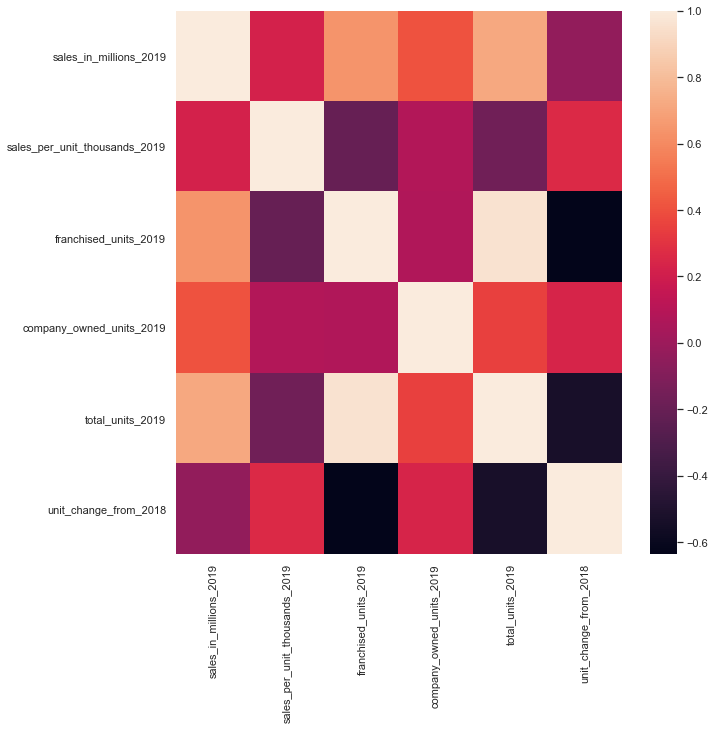

In [4]:
sns.set(style='darkgrid')
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr())
plt.show()

All variables have a **perfect correlation** to one another.

____

## Further Exploration with Tableau

The below Vizualizations were created with Tableau. 

All of the below Vizualizations can be referenced at:
> https://public.tableau.com/app/profile/joann.balraj

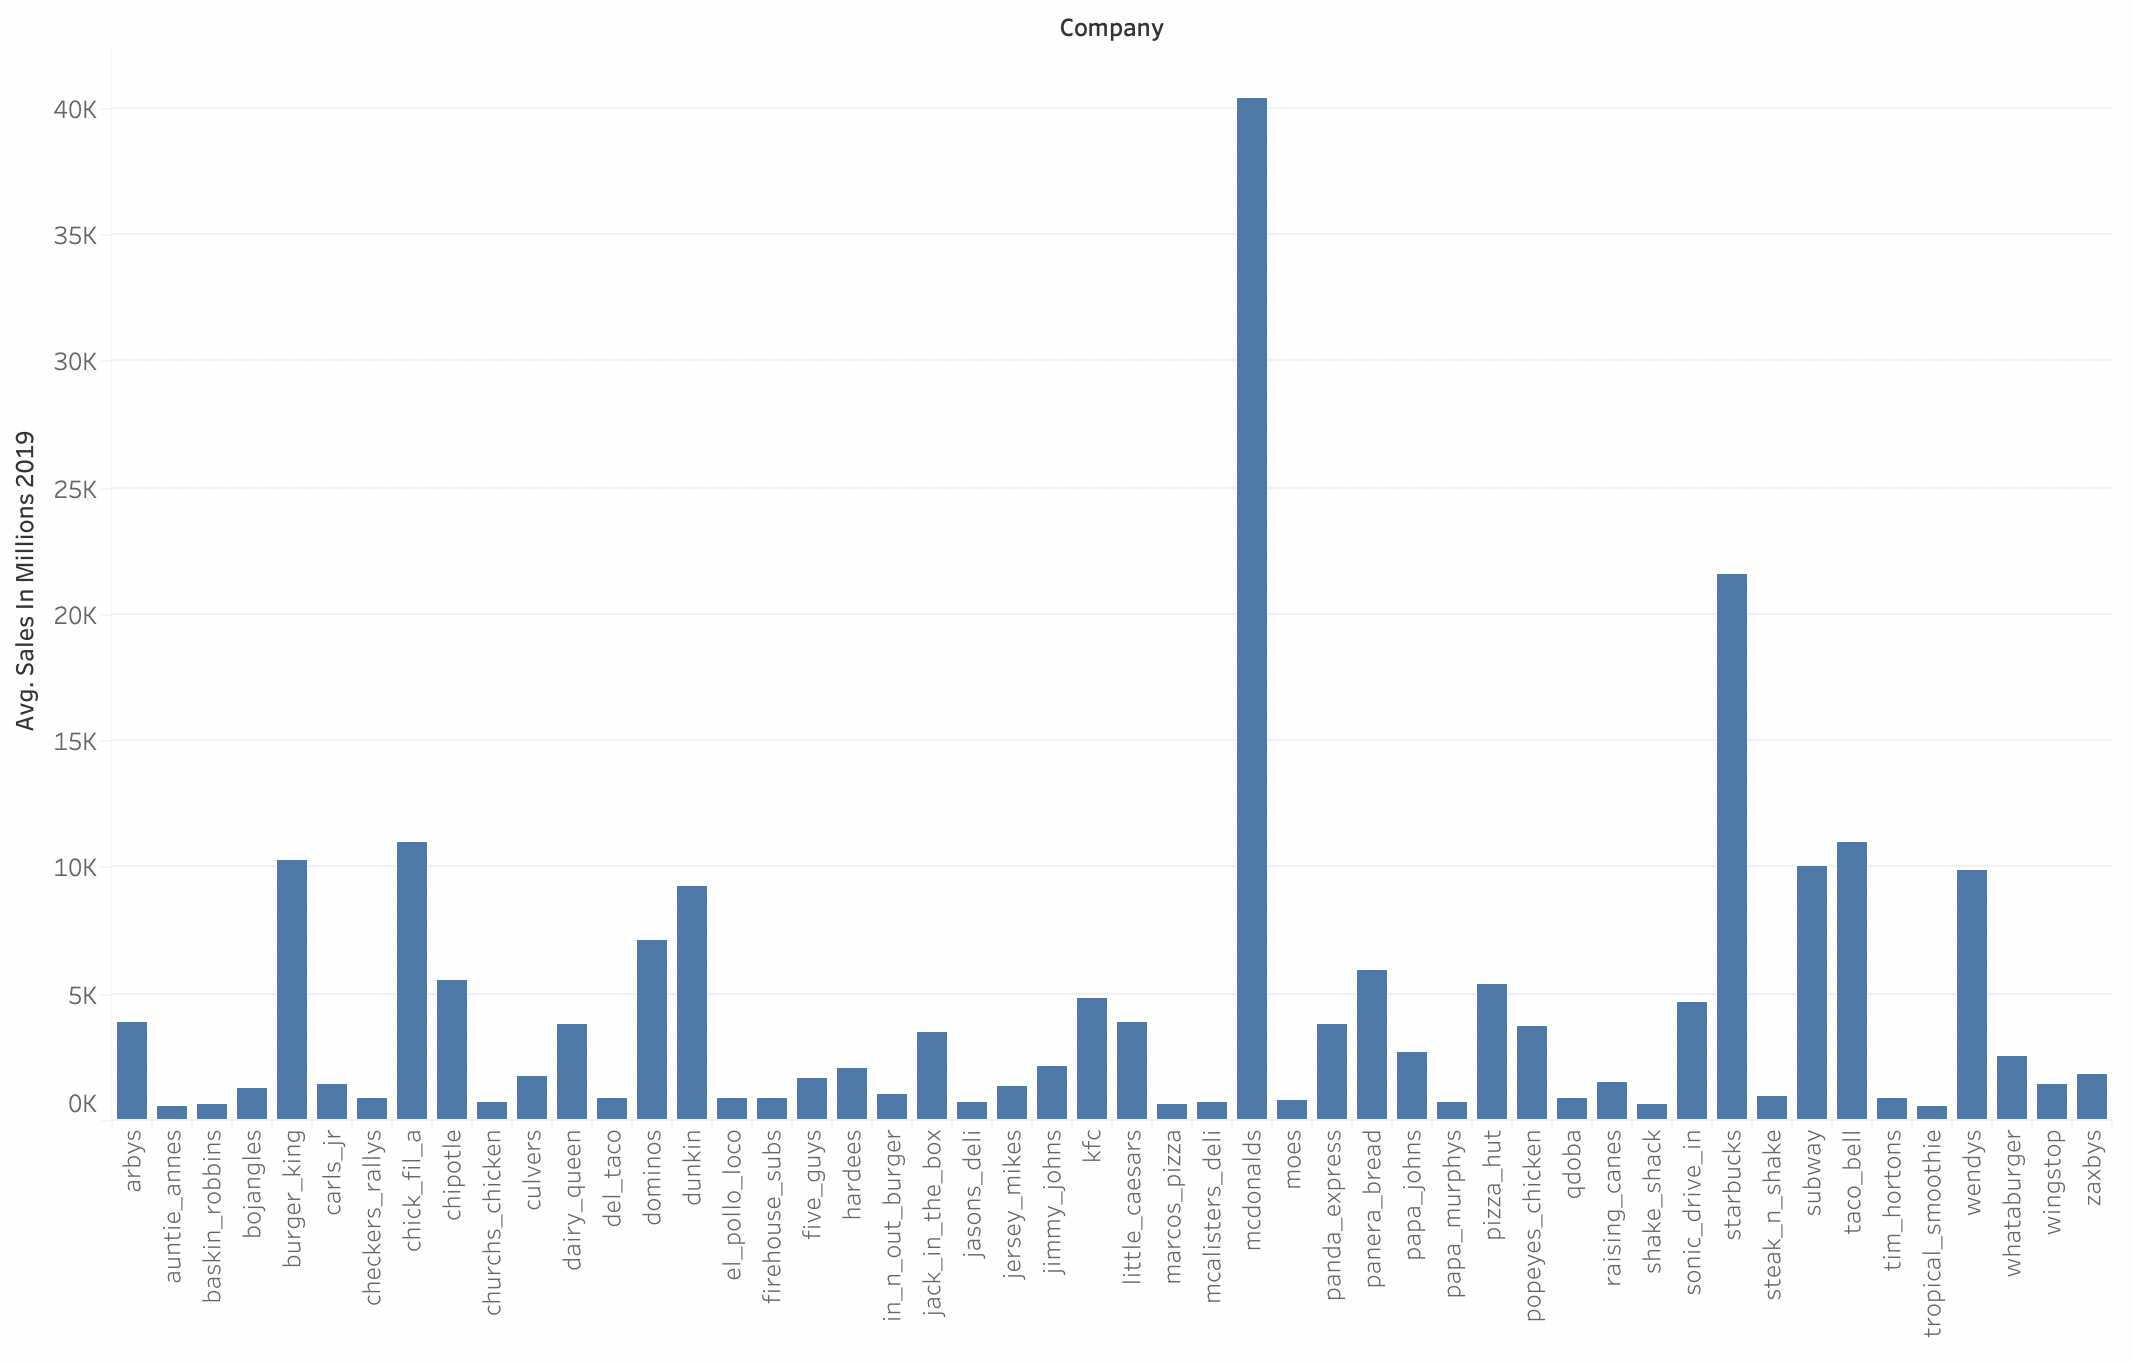

### Summary: "AVG Sales in Millions by Company (2019)" (Above)

- Mcdonald's has the highest amount of sales in millions by far with an average of over 40k of sales in millions.
- Starbucks follows with an average of over 20k of sales in millions.

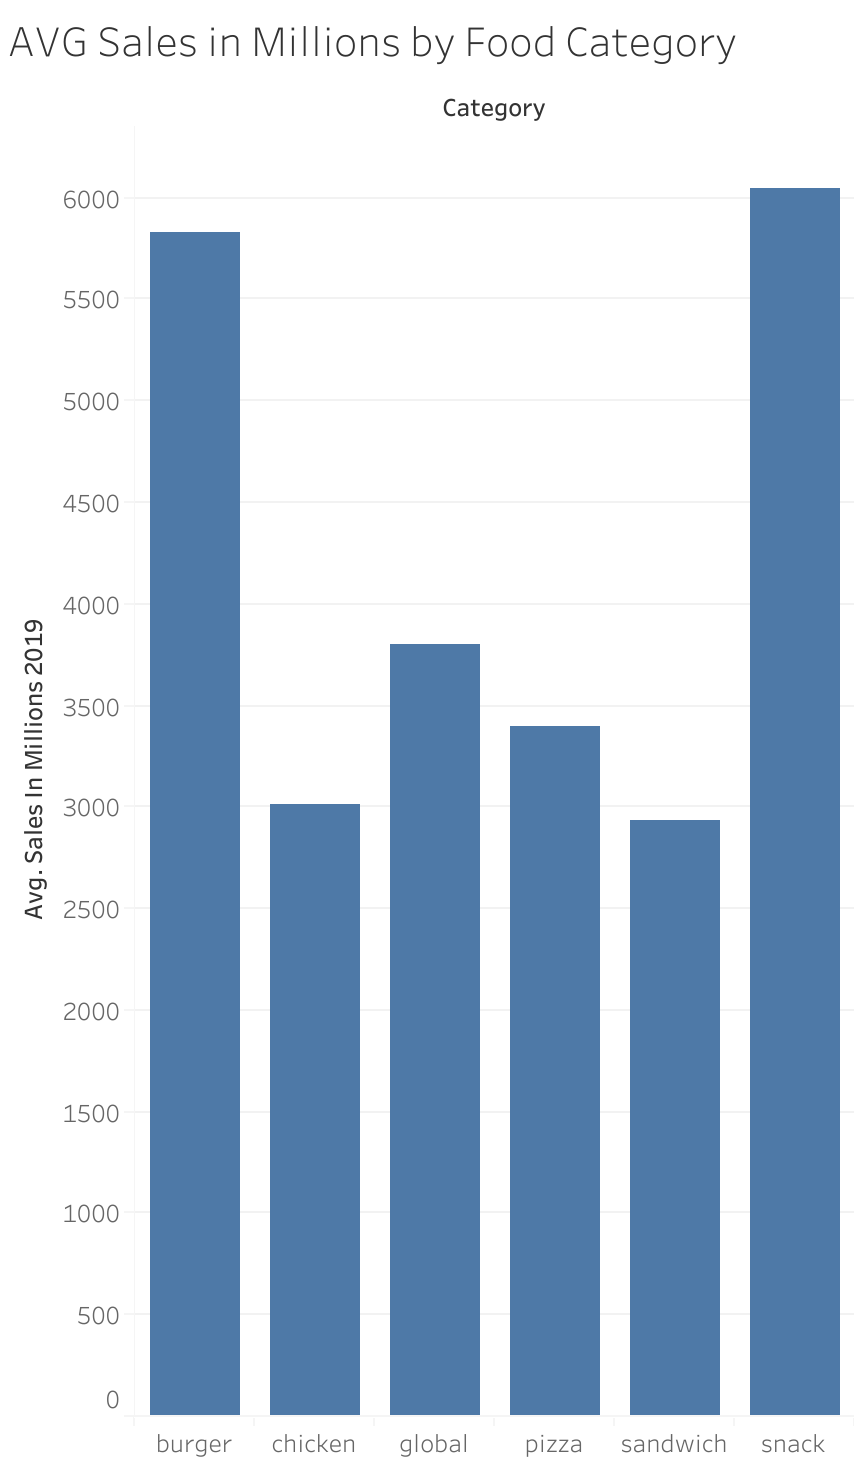

### Summary: "AVG Sales in Millions by Food Category (2019)" (Above)

- The food category 'snack' has the highest sales, but as we can see below it acts as a 'miscellanious' category.
- 'Burger' category is the next highest in sales. 

In [5]:
data[data.category == 'snack']

,company,category,sales_in_millions_2019,sales_per_unit_thousands_2019,franchised_units_2019,company_owned_units_2019,total_units_2019,unit_change_from_2018
1,starbucks,snack,21550,1454,6768,8273,15041,216
7,dunkin,snack,9220,968,9630,0,9630,42
17,dairy_queen,snack,3760,713,4379,2,4381,-25
47,baskin_robbins,snack,626,247,2524,0,2524,-26
48,tropical_smoothie,snack,577,769,833,1,834,115
49,auntie_annes,snack,563,562,1200,11,1211,-20


![AVG%20Sales%20Per%20Unit%20Thousands%20by%20Company%20%282019%29%20(1).png](attachment:AVG%20Sales%20Per%20Unit%20Thousands%20by%20Company%20%282019%29%20(1).png)
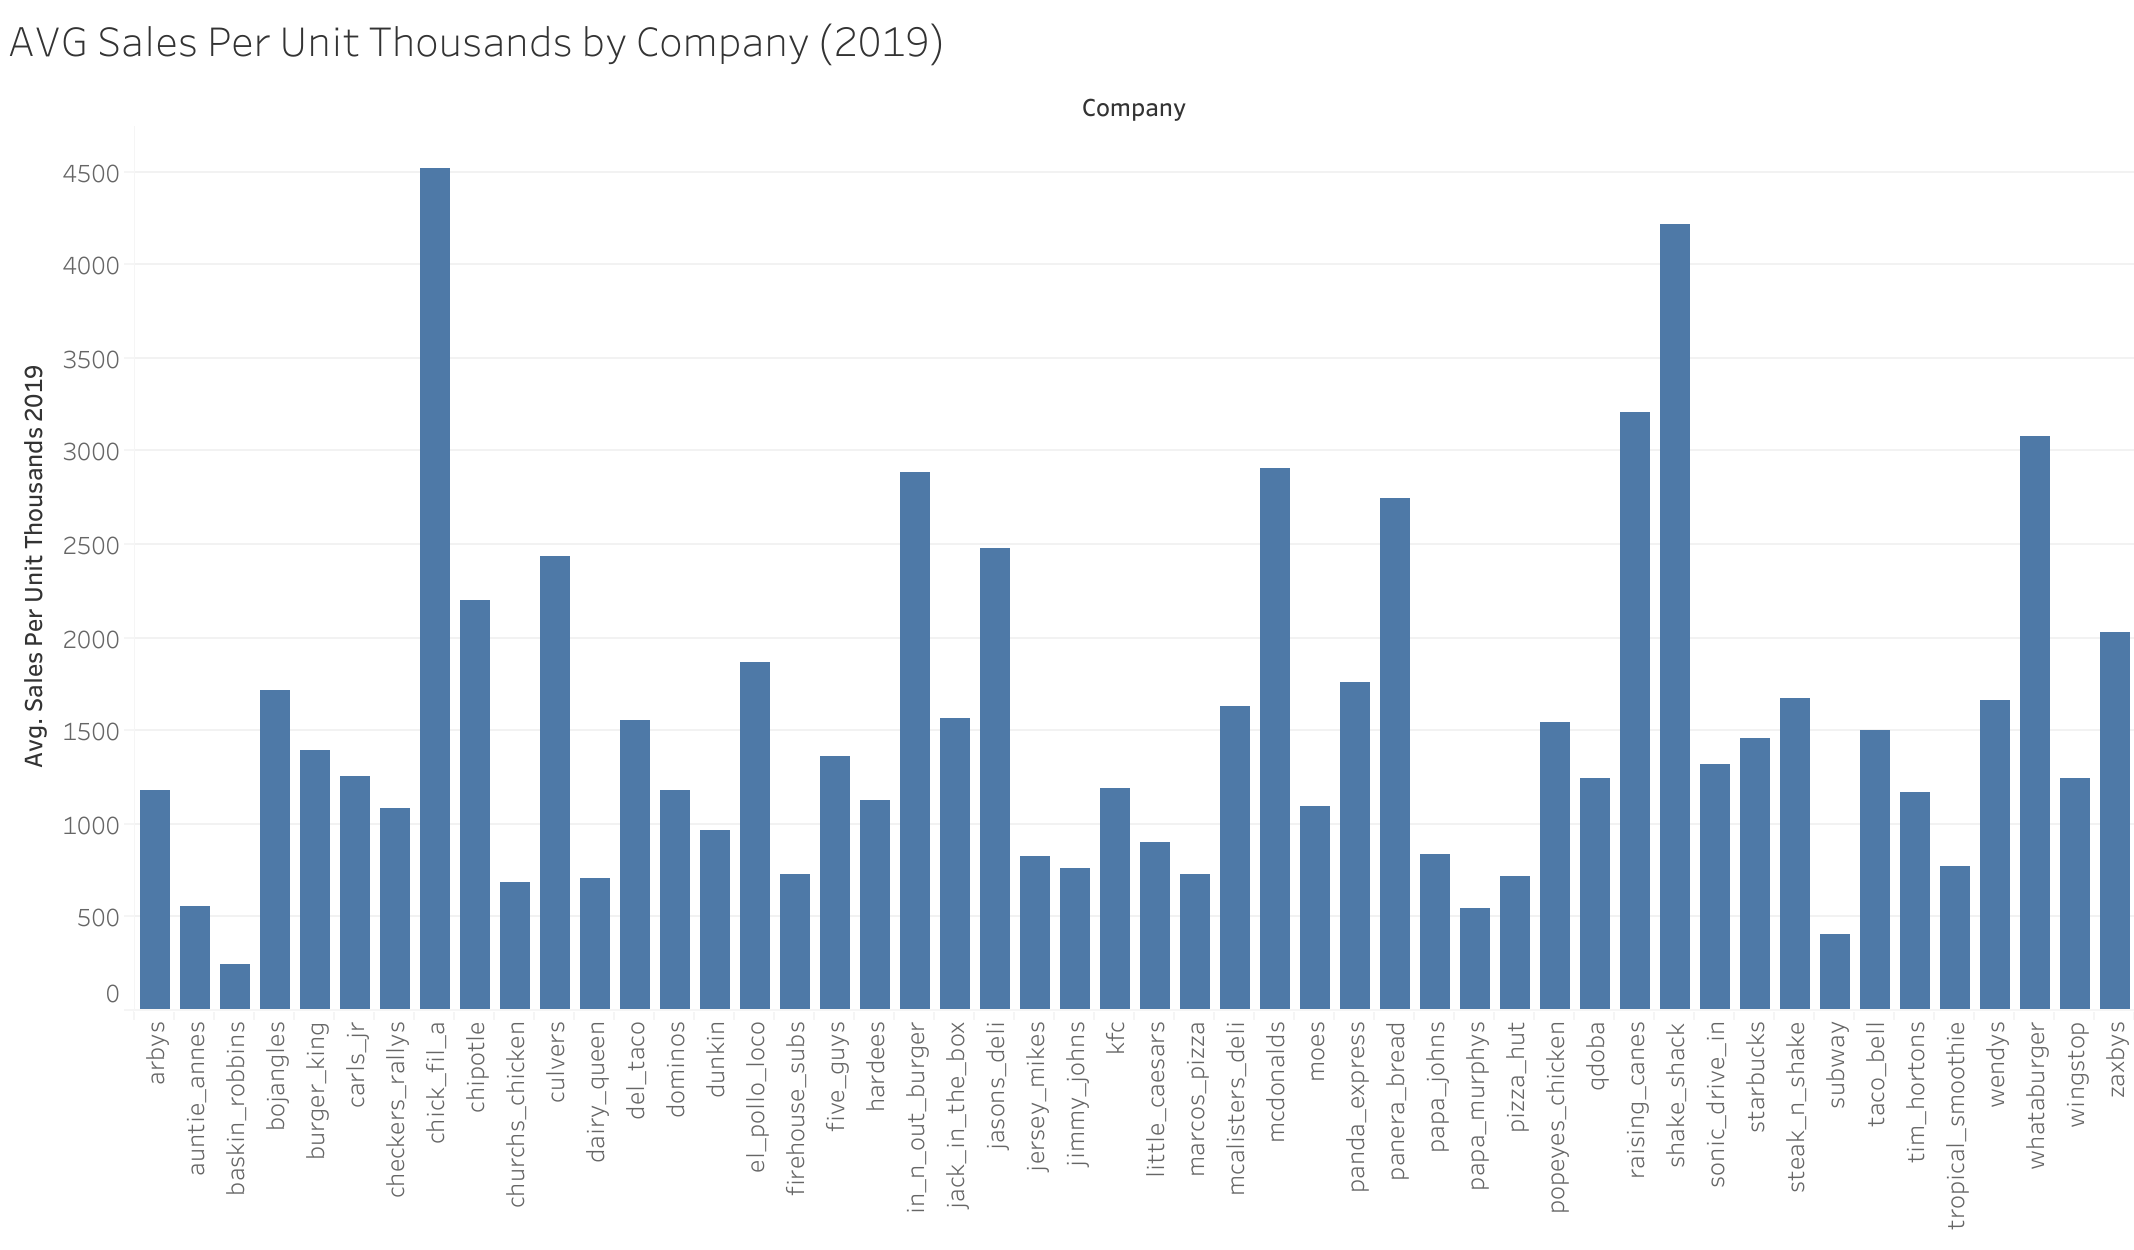

### Summary: "AVG Sales Per Unit Thousands by Company (2019)" (Above)

- Chick Fil A has the highest average sales with an average of about 4,500 per unit thousands.
- Shake Shack follows with an average of about 4,250 sales per unit thousands.

**Why does this differ from average sales in millions?**
- 'Sales Per Unit' are the total sales of a product

![AVG%20Sales%20Per%20Unit%20Thousands%20by%20Food%20Category%20%282019%29%20(1).png](attachment:AVG%20Sales%20Per%20Unit%20Thousands%20by%20Food%20Category%20%282019%29%20(1).png)
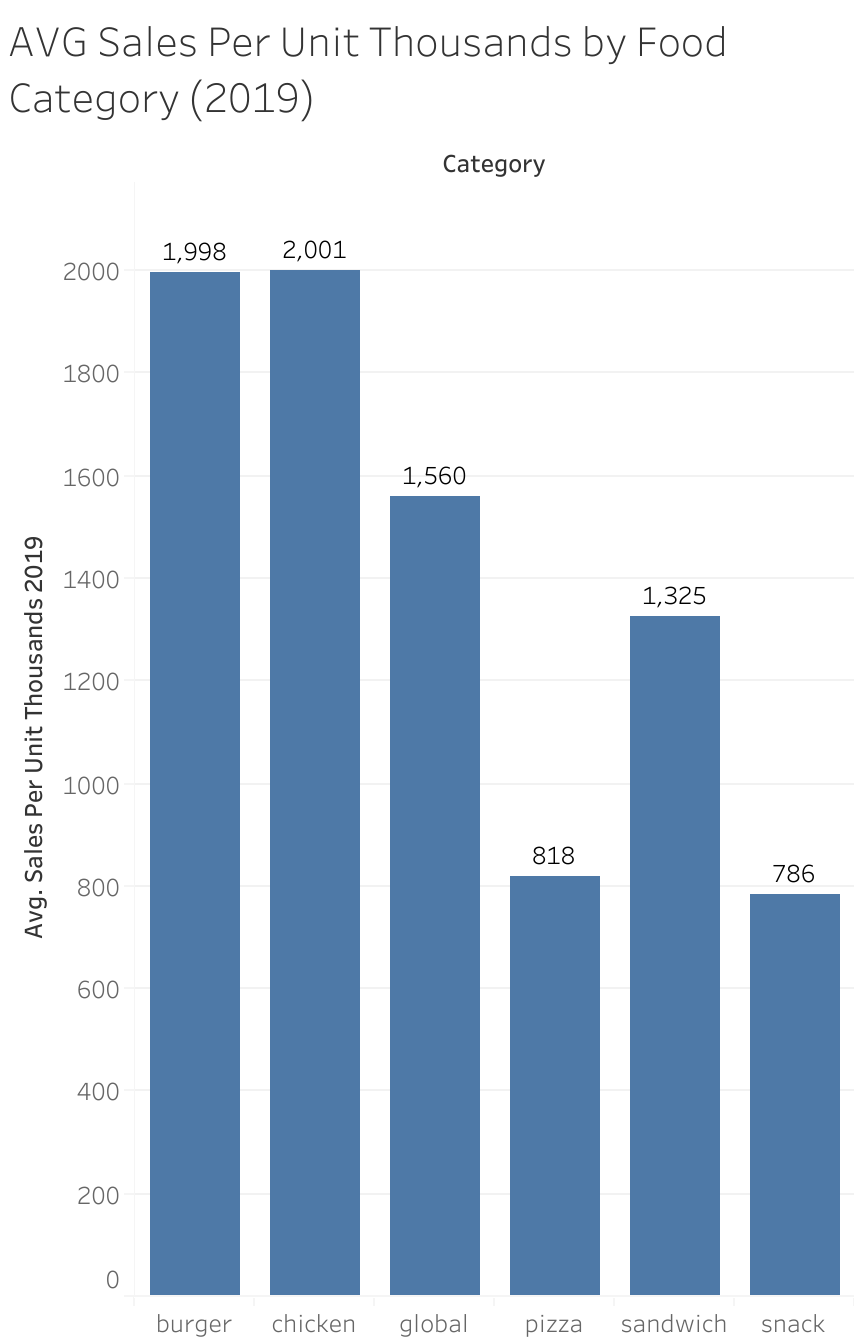

### Summary: "AVG Sales Per Unit Thousands by Food Category (2019)" (Above)

- Chicken barely beats burgers by only 3 sales per unit thousands (likely due to Chick Fil A being in the lead)
- Burgers follow, which makes sense as Shake Shack as well as other competitors are burger places. You would think burgers would be in the lead... 

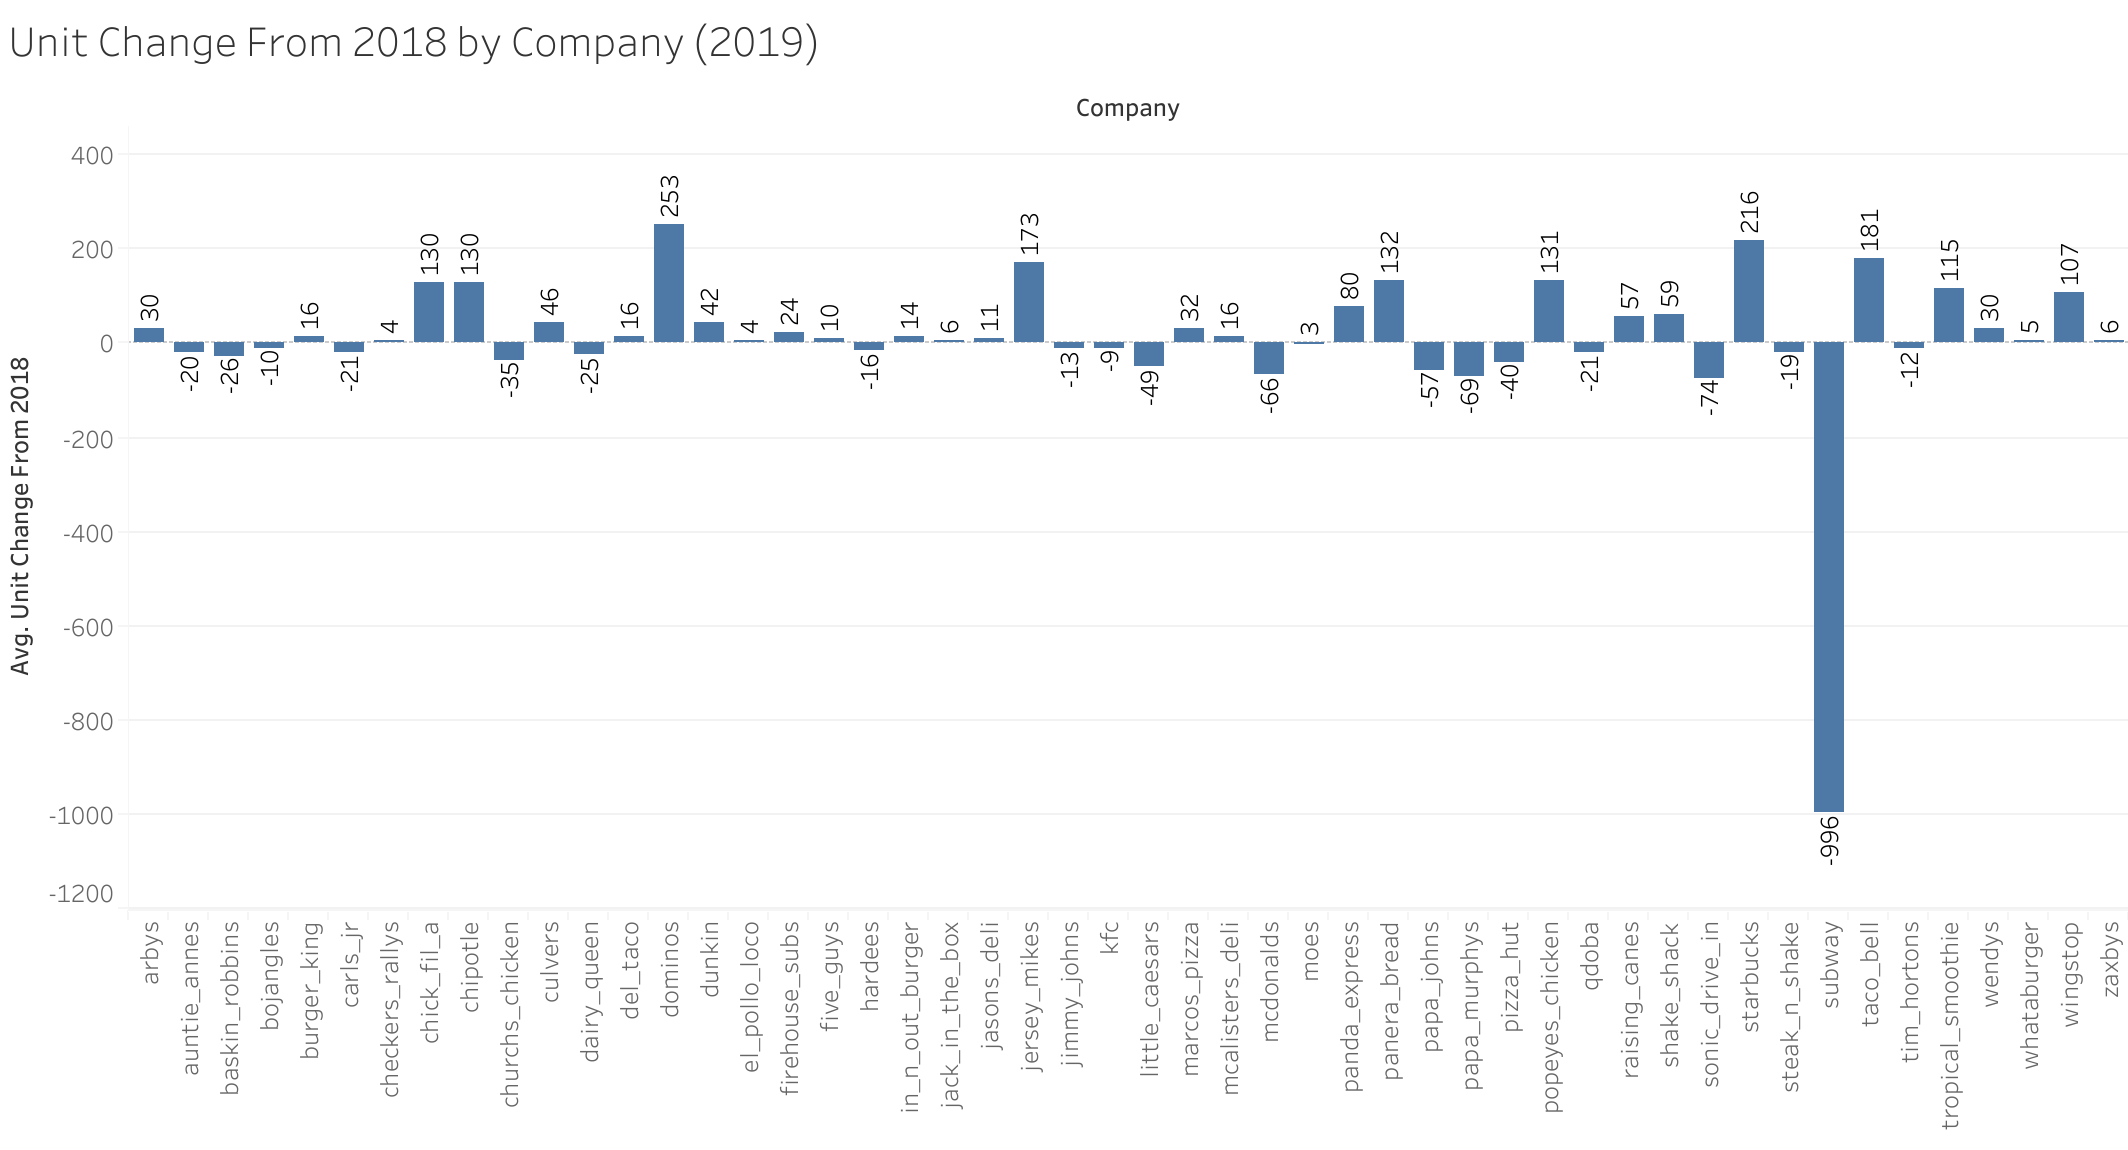

### Summary: "Unit Change From 2018 by Company (2019)" (Above)

- Subway is using significantly less product than in 2018. If you look at the sales charts above, Subway consistantly seems to be on the lower side of the competition.
- Dominos uses more product than in 2018 and has the highest difference.

This does not necessarily mean the company is doing better if they used more than last year. Factors include **employee consumption, remade orders, possibly throwing out old/food not sold, etc**.

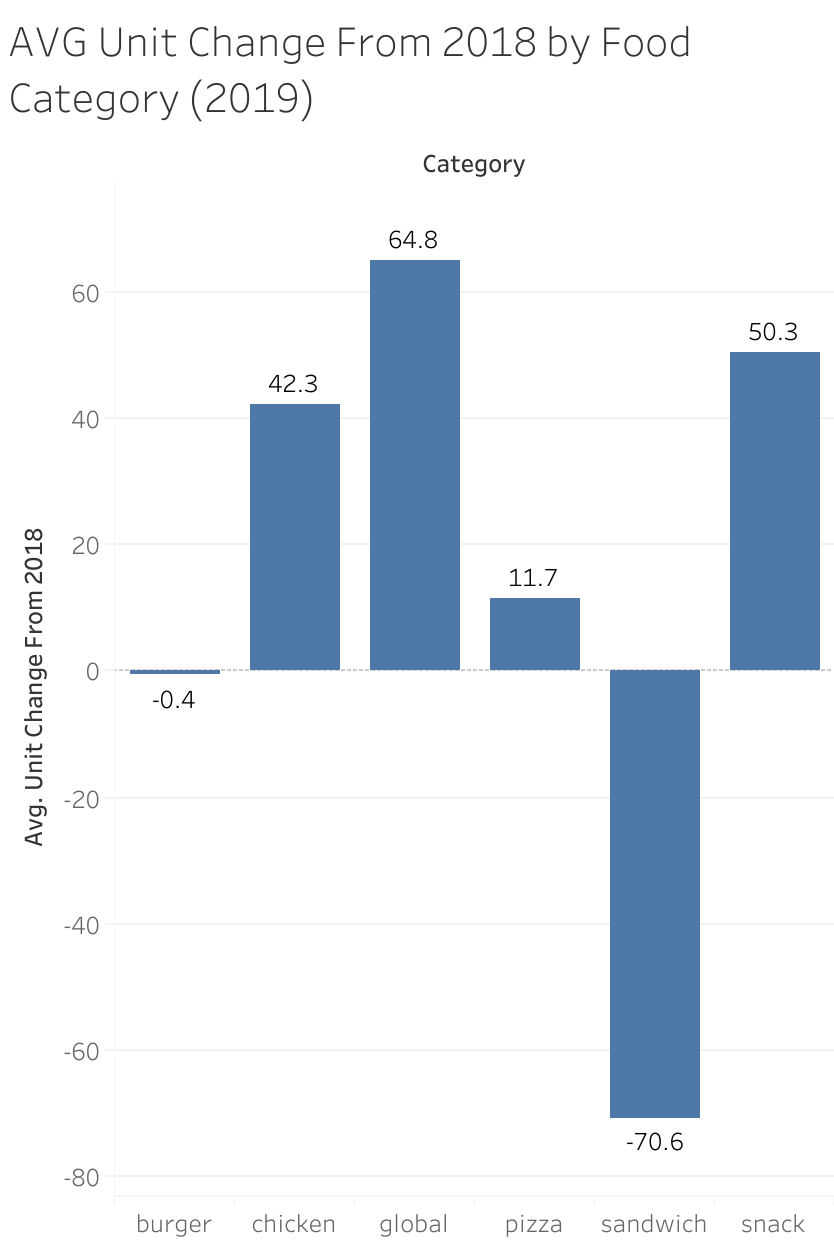

### Summary: "Unit Change From 2018 by Food Category (2019)" (Above)

- The sandwich category has a dramatic drop, possibly linked to Subway in decline.
- Looks like people now like chicken more than burgers, which makes sense with places like Chik Fil A and Raising Canes doing so well.
- People also seem to be more interested in global field, which could be due to the fact that people are becomming more interested in foreign food as time goes on.

#### Let's take a look at the global food category:

In [6]:
data[data.category == 'global']

,company,category,sales_in_millions_2019,sales_per_unit_thousands_2019,franchised_units_2019,company_owned_units_2019,total_units_2019,unit_change_from_2018
3,taco_bell,global,11000,1502,6622,467,7089,181
10,chipotle,global,5520,2195,0,2580,2580,130
16,panda_express,global,3800,1765,138,2046,2184,80
35,qdoba,global,850,1250,380,350,730,-21
38,del_taco,global,850,1554,296,300,596,16
40,moes,global,785,1095,719,3,722,3


Seems to be mostly Mexican food places, foreign fast food chains in general are doing good. Maybe people are bored of burgers and fries.

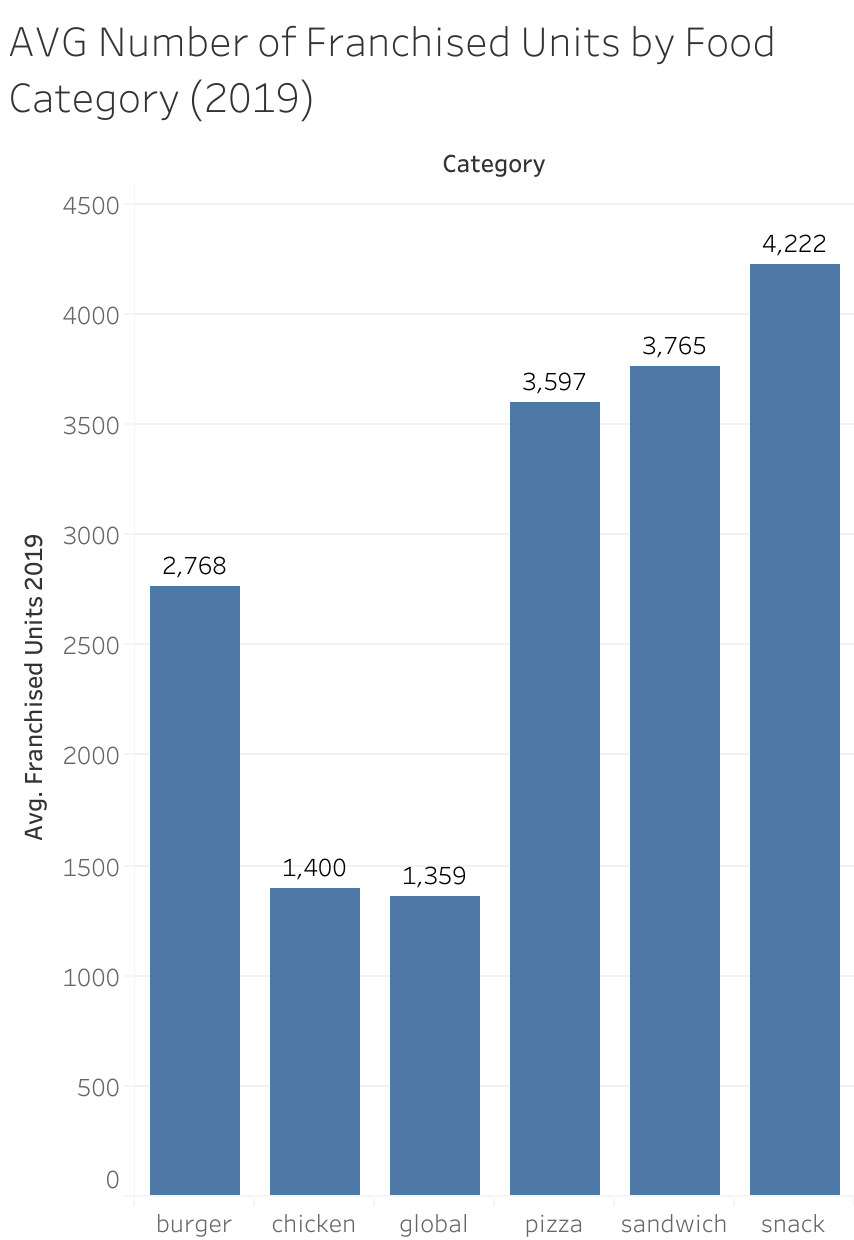

In [9]:
data[data.category == 'snack']

,company,category,sales_in_millions_2019,sales_per_unit_thousands_2019,franchised_units_2019,company_owned_units_2019,total_units_2019,unit_change_from_2018
1,starbucks,snack,21550,1454,6768,8273,15041,216
7,dunkin,snack,9220,968,9630,0,9630,42
17,dairy_queen,snack,3760,713,4379,2,4381,-25
47,baskin_robbins,snack,626,247,2524,0,2524,-26
48,tropical_smoothie,snack,577,769,833,1,834,115
49,auntie_annes,snack,563,562,1200,11,1211,-20


In [10]:
data[data.category == 'sandwich']

,company,category,sales_in_millions_2019,sales_per_unit_thousands_2019,franchised_units_2019,company_owned_units_2019,total_units_2019,unit_change_from_2018
5,subway,sandwich,10000,410,23802,0,23802,-996
9,panera_bread,sandwich,5925,2751,1202,1023,2225,132
14,arbys,sandwich,3885,1183,2170,1189,3359,30
22,jimmy_johns,sandwich,2105,759,2735,52,2787,-13
30,jersey_mikes,sandwich,1340,824,1595,72,1667,173
37,firehouse_subs,sandwich,855,729,1115,38,1153,24
39,tim_hortons,sandwich,840,1165,715,0,715,-12
42,mcalisters_deli,sandwich,719,1629,438,31,469,16
43,jasons_deli,sandwich,705,2478,110,180,290,11


In [11]:
data[data.category == 'burger']

,company,category,sales_in_millions_2019,sales_per_unit_thousands_2019,franchised_units_2019,company_owned_units_2019,total_units_2019,unit_change_from_2018
0,mcdonalds,burger,40413,2912,13154,692,13846,-66
4,burger_king,burger,10300,1399,7294,52,7346,16
6,wendys,burger,9865,1666,5495,357,5852,30
13,sonic_drive_in,burger,4687,1320,3329,197,3526,-74
19,jack_in_the_box,burger,3505,1565,2106,137,2243,6
21,whataburger,burger,2566,3080,127,703,830,5
23,hardees,burger,2070,1126,1713,117,1830,-16
25,culvers,burger,1730,2435,726,6,733,46
26,five_guys,burger,1662,1359,872,496,1368,10
29,carls_jr,burger,1390,1252,1052,48,1100,-21
